# Normalización de texto en español

Angel Israel Hernández Testa

## Exploración de texto

Numero total de tokens:  374
Numero total de tokens unicos:  196
[(',', 24), ('que', 14), ('de', 13), ('.', 13), ('el', 13), ('la', 9), ('las', 8), ('y', 8), ('en', 6), ('o', 6), ('más', 6), ('no', 5), ('un', 5), ('con', 5), ('es', 5)]


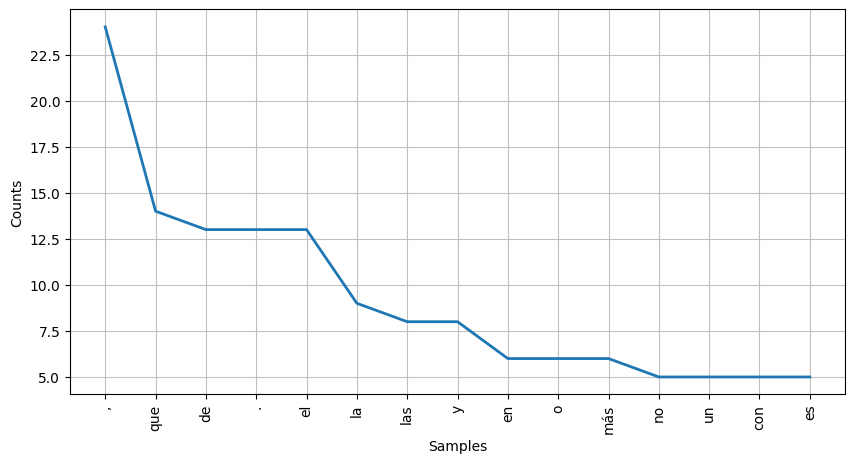

In [1]:
#Se importan las librerías a ocupar para la normalización
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import spacy

#Descargas de los recursos necesarios
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
#!python -m spacy download es_core_news_sm

# Cargar el modelo de SpaCy para español
nlp = spacy.load("es_core_news_sm")

#Texto que se va a procesar
text="Por lo general, no pensamos en las complejidades de nuestros propios lenguajes. Es un comportamiento intuitivo que se utiliza para transmitir información y significados con señales semánticas, como palabras, signos o imágenes. Se dice que es más fácil aprender un idioma nuevo cuando somos adolescentes porque se trata de un comportamiento repetible y entrenado, casi como caminar. Asimismo, el idioma no sigue un conjunto de reglas estricto, ya que las excepciones son innumerables, por ejemplo: los sustantivos que terminan con ‘a’ son femeninos, pero no es el caso del sustantivo ‘el problema‘. Sin embargo, a los humanos nos resulta natural es extremadamente difícil para las computadoras, ya que tienen que lidiar con una gran cantidad de datos no estructurados, la ausencia de reglas formales y la falta de un contexto o una intención real. Es por eso que el aprendizaje automático y la inteligencia artificial (IA) ganan fuerza y llaman la atención, puesto que los humanos dependen cada vez más de los sistemas informáticos para comunicarse y realizar tareas. A medida que la IA se vuelve más sofisticada, también lo hace el procesamiento del lenguaje natural (PLN). El Procesamiento del Lenguaje Natural es el campo de conocimiento de la Inteligencia Artificial que se ocupa de la investigar la manera de comunicar las máquinas con las personas mediante el uso de lenguas naturales, como el español, el inglés o el chino. Virtualmente, cualquier lengua humana puede ser tratada por los ordenadores. Lógicamente, limitaciones de interés económico o práctico hace que solo las lenguas más habladas o utilizadas en el mundo digital tengan aplicaciones en uso. Pensemos en cuántas lenguas hablan Siri (20) o Google Assistant (8). El inglés, español, alemán, francés, portugués, chino, árabe y japonés (no necesariamente en este orden) son las que cuentan con más aplicaciones que las entienden. Google Translate es la que más lenguas trata, superando el centenar... pero hay entre 5000 y 7000 lenguas en el mundo."
# 1er paso de la normalización será tokenizar el texto usando word_tokenize
tokens=word_tokenize(text)
#calculamos el total de tokens y tokens unicos
total_tokens=len(tokens)
uni_tokens=len(set(tokens))
print("Numero total de tokens: ", total_tokens)
print("Numero total de tokens unicos: ", uni_tokens)

#Calculamos la frecuencia de los token (qué tanto aparecen) y obtenemos los 15 más repetidos
freq_tokens = FreqDist(tokens)
top_15_tokens = freq_tokens.most_common(15)
print(top_15_tokens)
#Se realiza el plot de la figura
plt.figure(figsize=(10, 5))
freq_tokens.plot(15, cumulative=False)

plt.show()

##Normalización

In [16]:
#2do paso es eliminar los caracteres numéricos del texto
# Se crea un conjunto que contenga los dígitos del 0 al 9
digitos = set('0123456789')

# Eliminar los números del texto
texto_sin_numeros = ''.join(c for c in text if c not in digitos)

# Mostrar el texto sin números
print(texto_sin_numeros)
#Tokenizar el texto sin números
new_tokens=word_tokenize(texto_sin_numeros)

Por lo general, no pensamos en las complejidades de nuestros propios lenguajes. Es un comportamiento intuitivo que se utiliza para transmitir información y significados con señales semánticas, como palabras, signos o imágenes. Se dice que es más fácil aprender un idioma nuevo cuando somos adolescentes porque se trata de un comportamiento repetible y entrenado, casi como caminar. Asimismo, el idioma no sigue un conjunto de reglas estricto, ya que las excepciones son innumerables, por ejemplo: los sustantivos que terminan con ‘a’ son femeninos, pero no es el caso del sustantivo ‘el problema‘. Sin embargo, a los humanos nos resulta natural es extremadamente difícil para las computadoras, ya que tienen que lidiar con una gran cantidad de datos no estructurados, la ausencia de reglas formales y la falta de un contexto o una intención real. Es por eso que el aprendizaje automático y la inteligencia artificial (IA) ganan fuerza y llaman la atención, puesto que los humanos dependen cada vez má

In [17]:
#3er paso de normalización es transformar el texto a minúscula, usando .lower()
tokens_lowercase = [token.lower() for token in new_tokens]
print(tokens_lowercase)


['por', 'lo', 'general', ',', 'no', 'pensamos', 'en', 'las', 'complejidades', 'de', 'nuestros', 'propios', 'lenguajes', '.', 'es', 'un', 'comportamiento', 'intuitivo', 'que', 'se', 'utiliza', 'para', 'transmitir', 'información', 'y', 'significados', 'con', 'señales', 'semánticas', ',', 'como', 'palabras', ',', 'signos', 'o', 'imágenes', '.', 'se', 'dice', 'que', 'es', 'más', 'fácil', 'aprender', 'un', 'idioma', 'nuevo', 'cuando', 'somos', 'adolescentes', 'porque', 'se', 'trata', 'de', 'un', 'comportamiento', 'repetible', 'y', 'entrenado', ',', 'casi', 'como', 'caminar', '.', 'asimismo', ',', 'el', 'idioma', 'no', 'sigue', 'un', 'conjunto', 'de', 'reglas', 'estricto', ',', 'ya', 'que', 'las', 'excepciones', 'son', 'innumerables', ',', 'por', 'ejemplo', ':', 'los', 'sustantivos', 'que', 'terminan', 'con', '‘', 'a', '’', 'son', 'femeninos', ',', 'pero', 'no', 'es', 'el', 'caso', 'del', 'sustantivo', '‘', 'el', 'problema', '‘', '.', 'sin', 'embargo', ',', 'a', 'los', 'humanos', 'nos', 'res

In [18]:
#4to paso eliminamos los signos de puntuación. haciendo uso de un conjunto (set) de signos y añadiendo símbolos al set
punctuation_signs = set(string.punctuation)
punctuation_signs.add("‘")
punctuation_signs.add("’")
punctuation_signs.add("...")
print(punctuation_signs)
#elimina los signos de puntuación sobre el texto en minusculas y guardamos el resultado en un arreglo tk
tk=[w for w in tokens_lowercase if not w in punctuation_signs]
print(tk)

{'%', ']', '*', '[', '@', ';', ':', '}', '?', '~', '’', '\\', '"', '>', '/', '.', '=', ')', '!', '+', '|', '$', ',', '<', '‘', '&', '{', '(', '-', '_', "'", '^', '...', '#', '`'}
['por', 'lo', 'general', 'no', 'pensamos', 'en', 'las', 'complejidades', 'de', 'nuestros', 'propios', 'lenguajes', 'es', 'un', 'comportamiento', 'intuitivo', 'que', 'se', 'utiliza', 'para', 'transmitir', 'información', 'y', 'significados', 'con', 'señales', 'semánticas', 'como', 'palabras', 'signos', 'o', 'imágenes', 'se', 'dice', 'que', 'es', 'más', 'fácil', 'aprender', 'un', 'idioma', 'nuevo', 'cuando', 'somos', 'adolescentes', 'porque', 'se', 'trata', 'de', 'un', 'comportamiento', 'repetible', 'y', 'entrenado', 'casi', 'como', 'caminar', 'asimismo', 'el', 'idioma', 'no', 'sigue', 'un', 'conjunto', 'de', 'reglas', 'estricto', 'ya', 'que', 'las', 'excepciones', 'son', 'innumerables', 'por', 'ejemplo', 'los', 'sustantivos', 'que', 'terminan', 'con', 'a', 'son', 'femeninos', 'pero', 'no', 'es', 'el', 'caso', 'd

In [19]:
#5to paso eliminamos las stop words haciendo uso de un set de stopwords en español de la librería nltk
stop_words=set(stopwords.words("spanish"))
#Se muestra el set de stopwords
print(stop_words)
#Se eliminan las stopwords del texto anterior y se guarda en un nuevo arreglo filtrado
filtered_text=[w for w in tk if not w in stop_words]
print(filtered_text)

{'habías', 'el', 'habiendo', 'estarán', 'desde', 'más', 'tuviesen', 'nuestro', 'mi', 'hubimos', 'fueras', 'sentid', 'habrán', 'tenidas', 'se', 'tendría', 'otros', 'habíamos', 'teniendo', 'los', 'habréis', 'nosotros', 'esté', 'algo', 'vuestra', 'esos', 'tendrías', 'habida', 'teníais', 'hubierais', 'tenían', 'estuvieran', 'todos', 'ellos', 'tengas', 'estarás', 'fuera', 'tuvieran', 'hubiésemos', 'que', 'muy', 'uno', 'tendrá', 'las', 'seremos', 'ti', 'hubieseis', 'estás', 'estuvierais', 'lo', 'estuve', 'tuvieses', 'soy', 'siente', 'por', 'nosotras', 'míos', 'nuestras', 'habremos', 'tendremos', 'estuviese', 'sentidas', 'sintiendo', 'tuve', 'tuvimos', 'éramos', 'eso', 'estuvo', 'tenga', 'estábamos', 'mis', 'estará', 'eran', 'quien', 'estuvisteis', 'fuiste', 'estabais', 'pero', 'otro', 'estuvimos', 'del', 'esta', 'fueran', 'la', 'seamos', 'al', 'todo', 'ni', 'esto', 'y', 'sea', 'estando', 'fueseis', 'tuviera', 'poco', 'unos', 'hubieses', 'mía', 'hubieron', 'estuviéramos', 'tenidos', 'estés', 

In [20]:
#6to paso será lematizar el texto haciendo uso del lemmatizer de SpaCy y se guarda el resultado en un nuevo arreglo lematizado

#Se une los tokens filtrados en un solo texto
texto_filtrado = ' '.join(filtered_text)
#Procesar el texto filtrado con SpaCy para realizar la lematización
doc = nlp(texto_filtrado)
# Se guardan los lemas de cada token en el nuevo arreglo
lemmatized_text = [token.lemma_ for token in doc]
print(lemmatized_text)

['general', 'pensar', 'complejidad', 'propio', 'lenguaje', 'comportamiento', 'intuitivo', 'utilizar', 'transmitir', 'información', 'significado', 'señal', 'semántico', 'palabra', 'signo', 'imágén', 'decir', 'fácil', 'aprender', 'idioma', 'nuevo', 'adolescente', 'tratar', 'comportamiento', 'repetible', 'entrenado', 'casi', 'caminar', 'asimismo', 'idioma', 'seguir', 'conjunto', 'regla', 'estricto', 'excepción', 'innumerable', 'ejemplo', 'sustantivo', 'terminar', 'femenino', 'caso', 'sustantivo', 'problema', 'embargo', 'humanos', 'resultar', 'natural', 'extremadamente', 'difícil', 'computadora', 'lidiar', 'gran', 'cantidad', 'dato', 'estructurado', 'ausencia', 'regla', 'formal', 'faltar', 'contexto', 'intención', 'real', 'aprendizaje', 'automático', 'inteligencia', 'artificial', 'ia', 'ganar', 'fuerza', 'llamar', 'atención', 'puesto', 'humanos', 'depender', 'cada', 'vez', 'sistema', 'informático', 'comunicar él', 'realizar', 'tarea', 'medida', 'ia', 'volver', 'sofisticado', 'hacer', 'proc

In [21]:
#7mo finalmente para la normalización se hará un etiquetado de part-of-speech (pos tag) haciendo uso de SpaCy
# Se unen los tokens lematizados en un texto
texto_lematizado = ' '.join(lemmatized_text)

#Procesa el texto
doc = nlp(texto_lematizado)

#Obteniene las etiquetas POS de cada token en el texto lematizado
pos_tags = [(token.text, token.pos_) for token in doc]

print(pos_tags)

[('general', 'ADJ'), ('pensar', 'VERB'), ('complejidad', 'NOUN'), ('propio', 'DET'), ('lenguaje', 'NOUN'), ('comportamiento', 'NOUN'), ('intuitivo', 'ADJ'), ('utilizar', 'VERB'), ('transmitir', 'VERB'), ('información', 'NOUN'), ('significado', 'ADJ'), ('señal', 'NOUN'), ('semántico', 'ADJ'), ('palabra', 'NOUN'), ('signo', 'ADJ'), ('imágén', 'VERB'), ('decir', 'VERB'), ('fácil', 'ADJ'), ('aprender', 'VERB'), ('idioma', 'NOUN'), ('nuevo', 'ADJ'), ('adolescente', 'NOUN'), ('tratar', 'VERB'), ('comportamiento', 'NOUN'), ('repetible', 'ADJ'), ('entrenado', 'ADJ'), ('casi', 'ADV'), ('caminar', 'VERB'), ('asimismo', 'ADV'), ('idioma', 'VERB'), ('seguir', 'VERB'), ('conjunto', 'NOUN'), ('regla', 'ADJ'), ('estricto', 'ADJ'), ('excepción', 'NOUN'), ('innumerable', 'ADJ'), ('ejemplo', 'NOUN'), ('sustantivo', 'ADJ'), ('terminar', 'VERB'), ('femenino', 'ADJ'), ('caso', 'NOUN'), ('sustantivo', 'ADJ'), ('problema', 'NOUN'), ('embargo', 'ADJ'), ('humanos', 'VERB'), ('resultar', 'VERB'), ('natural', 'A

##Exploración de texto post normalización

Numero total de tokens:  160
Numero total de tokens unicos:  131
[('lengua', 6), ('natural', 4), ('lenguaje', 3), ('tratar', 3), ('comportamiento', 2), ('idioma', 2), ('regla', 2), ('sustantivo', 2), ('humanos', 2), ('inteligencia', 2), ('artificial', 2), ('ia', 2), ('hacer', 2), ('procesamiento', 2), ('uso', 2)]


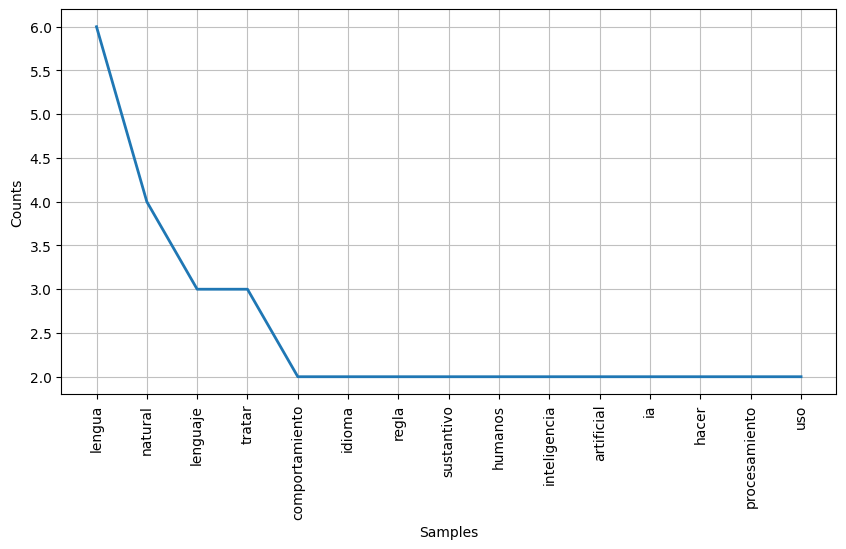

In [22]:
#Realizamos nuevamente el conteo de tokens y tokens unicos sobre el texto normalizado
new_total_tokens=len(lemmatized_text)
new_uni_tokens=len(set(lemmatized_text))
print("Numero total de tokens: ", new_total_tokens)
print("Numero total de tokens unicos: ", new_uni_tokens)
#Se calcula la frecuencia de tokens para el texto normalizado y los 15 tokens más comunes
new_freq_tokens = FreqDist(lemmatized_text)
new_top_15_tokens = new_freq_tokens.most_common(15)
print(new_top_15_tokens)
#plot de los nuevos 15 tokens
plt.figure(figsize=(10, 5))
new_freq_tokens.plot(15, cumulative=False)

plt.show()